<a href="https://colab.research.google.com/github/mariangellobon/IntroCienciaDatos-Apuntes/blob/main/Tema_4_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeros ejemplos de regresión

Usaremos la función `LinearRegression` que implementa el método OLS (Mínimos Cuadrados)


## Mi primera regresión lineal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

1. Carga de datos

In [ ]:
# Datos de ejemplo (horas estudiadas vs. puntaje en el examen)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])


In [ ]:
import pandas as pd
df = pd.DataFrame({'X': X.flatten(), 'Y': y})
df

,X,Y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


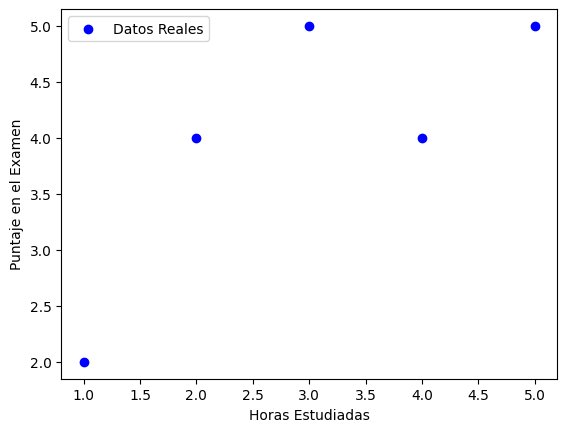

In [ ]:
# Plot the data
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Puntaje en el Examen')
plt.legend()
plt.show()

2. Limpieza, Preparación y División de datos: en este ejemplo no la hacemos

3. Selección de Modelo y Entrenamiento

In [ ]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# Predicciones de los datos de entrenamiento
y_pred = model.predict(X)


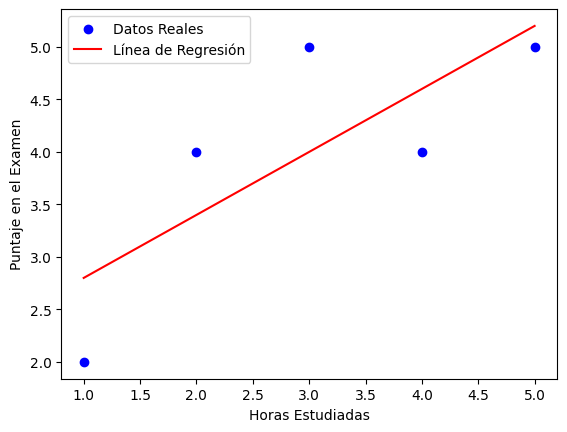

In [ ]:
# Visualización
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Puntaje en el Examen')
plt.legend()
plt.show()


4. Evaluación del modelo: no lo hacemos

5. Predicción de nuevos datos

In [ ]:
x_new = np.array([[2.5]])

In [ ]:
y_new = model.predict(x_new)
print(y_new)

[3.7]


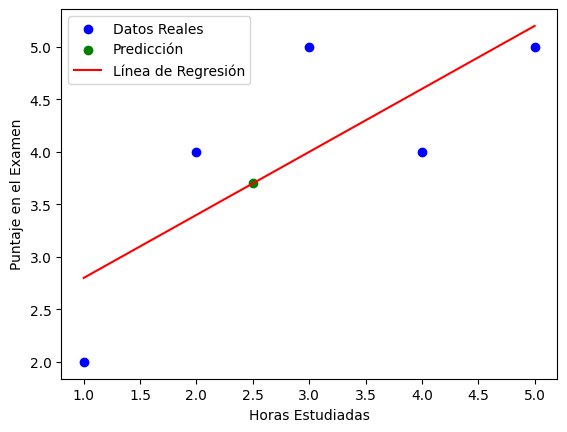

In [ ]:
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.scatter(x_new, y_new, color="green", label="Predicción")
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Puntaje en el Examen')
plt.legend()
plt.show()

## Mi primera regresión no lineal


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

1. Carga de datos

In [ ]:
# Datos de ejemplo (años de experiencia vs. salario)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([30, 35, 40, 48, 60, 72, 85, 100, 115, 130])


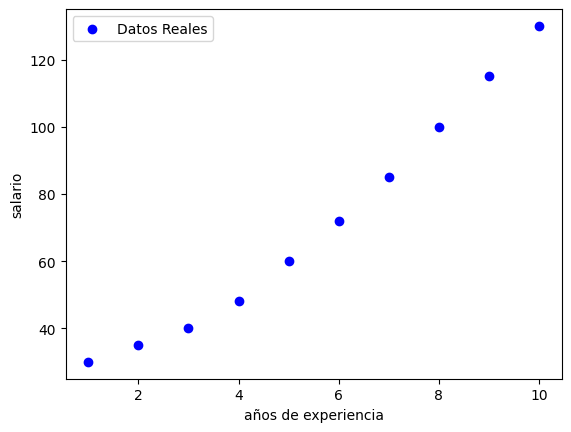

In [ ]:
# Plot the data
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.xlabel('años de experiencia')
plt.ylabel('salario')
plt.legend()
plt.show()

2. Limpieza, Preparación y División de datos: Transformar los datos para poder calcular la regresión con scikit learn. Esto se hace con el método `PolynomialFeatures`

In [ ]:
# Transformación polinómica de grado 2
poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)
# Ahora, X_poly contiene [1, x, x^2]

3. Selección del modelo y entrenamiento:

In [ ]:
# Crear y entrenar el modelo polinómico
pipeline = Pipeline([
    ('poly_features', poly),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X, y)



Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

4. Evaluación del modelo: no lo hacemos

5. Predicción de ddatos nuevos

In [ ]:
# Predicciones en datos nuevos
X_test = np.linspace(1, 10, 10).reshape(-1, 1)-0.5
y_pred = pipeline.predict(X_test)

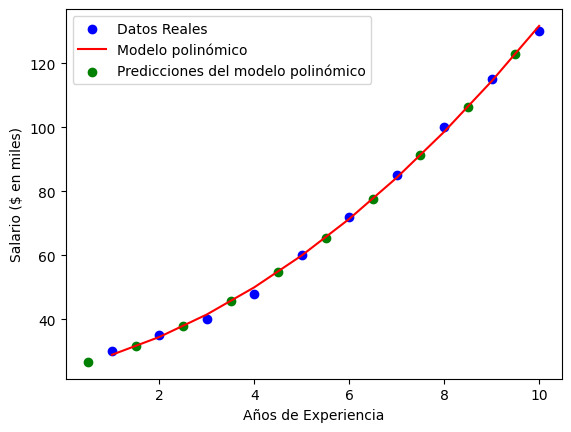

In [ ]:
# Visualización
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, pipeline.predict(X), color='red', label='Modelo polinómico')
plt.scatter(X_test, y_pred, color='green', label='Predicciones del modelo polinómico')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario ($ en miles)')
plt.legend()
plt.show()


# Ciclo iterativo del entrenamiento

## Regrtesión lineal sin regularización y sin ajuste de hiperparámetros

En los ejemplos anteriores hemos usado la función `LinearRegression`, que usa el método OLS para calcular la regresión. Esta calcula la equación de la recta resolviendo los coeficientes. A partir de ahora usaremos la función `SGDRegressor`, que sí que usa el ciclo iterativo típico para los algoritmos de Machine Learning explicado en clase (con Gradient Descent como método de optimización).

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. Cargamos los datos

In [ ]:
# Generar datos de ejemplo
X = np.random.rand(100, 1) * 10  # 100 muestras, 1 característica
y = 3 * X.flatten() + np.random.randn(100) * 2  # Relación lineal con ruido


In [ ]:
df = pd.DataFrame({'X': X.flatten(), 'Y': y})
df.head()

,X,Y
0,8.306345,22.315582
1,1.526205,4.467035
2,6.260792,17.556463
3,1.434047,3.020265
4,4.446476,14.501168


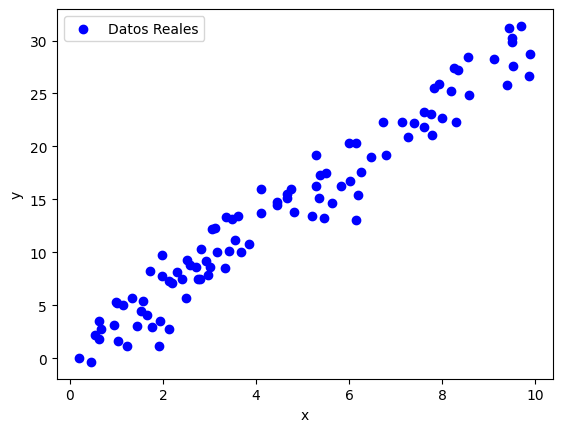

In [ ]:
# Plot the data
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Limpieza, Preparación y División de Datos

In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

3. Selección del modelo y Entrenaiento: Entrenar la regresión lineal sin regularización. Cuando ejecutamos el método `.fit()`, aquí es dónde se realiza el ciclo iterativo de entrenamiento hasta que el error converge.

In [ ]:
# Crear y configurar el modelo SGDRegressor
model = SGDRegressor(
    loss='squared_error',      # Especificar la función de pérdida (loss function) (MSE)
    penalty=None,             # Sin regularización
    max_iter=1000,            # Número máximo de iteraciones
    learning_rate='adaptive',  # Esquema de tasa de aprendizaje
    eta0=0.01,                # Tasa de aprendizaje inicial
    random_state=0 # Semilla para que sea reproducible
)

# Entrenar el modelo utilizando descenso de gradiente
model.fit(X_train, y_train)

SGDRegressor(learning_rate='adaptive', penalty=None, random_state=0)

4. Evaluación del modelo: Realizar predicciones en el conjunto de test y evaluar el error

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
# comparamos los valores reales (y_test) vs las predicciones (y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 5.4785226749657925
R²: 0.9328895119559542


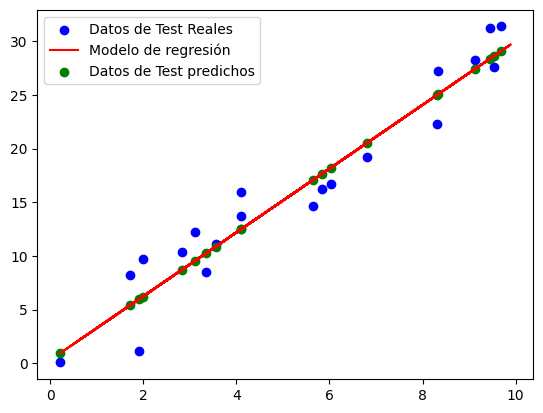

In [ ]:
# Visualización de las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos de Test Reales')
plt.plot(X, model.predict(X), color='red', label='Modelo de regresión')
plt.scatter(X_test, y_pred, color='green', label='Datos de Test predichos')
plt.legend()
plt.show()

## Regresión Lineal Con regularización y Sin ajuste de hiperparámetros
Este apartado lo podéis repasar en casa

El código es igual, pero al definir el modelo, indicamos la regularización en el argumento `penalty`

In [ ]:
# Crear y configurar el modelo SGDRegressor con regularización L2
model = SGDRegressor(
    loss='squared_error',
    penalty='l2',          # Regularización L2
    alpha=0.0001,          # Tasa de penalización (coeficiente de regularización)
    max_iter=1000,
    learning_rate='adaptive',
    eta0=0.01,                # Tasa de aprendizaje inicial
    random_state=0 # Semilla para que sea reproducible
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE con L2:", mse)
print("R² con L2:", r2)


MSE con L2: 3.278439025317933
R² con L2: 0.9413171383108575


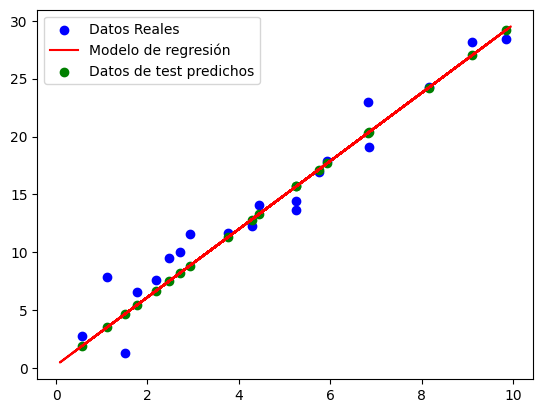

In [ ]:
# Visualización
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X, model.predict(X), color='red', label='Modelo de regresión')
plt.scatter(X_test, y_pred, color='green', label='Datos de test predichos')
plt.legend()
plt.show()

Como el ejemplo es tan básico, no se nota mucho la diferencia

## Con Optimización de hiperparámetros (y regularización)

En el apartado anterior hemos visto que el parámetro λ de la regularización es un hiper parámetro. Para encontrar el valor óptimo, podemos hacer una Grid Search con cross-validation (de nuevo, el ejemplo es básico así que en este caso no se notará mucho la diferencia).

Además de este, otros hiper parámetros que podemos probar son:
*   Estrategia de tasa de aprendizaje
*   Tasa de aprendizaje inicial
*   Número máximo de iteraciones

Importamos librerías

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. Cargamos los datos

In [ ]:
# Generar datos de ejemplo
X = np.random.rand(100, 1) * 10  # 100 muestras, 1 característica
y = 3 * X.flatten() + np.random.randn(100) * 2  # Relación lineal con ruido

2. Limpieza, Preparación y División de Datos

In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

3. Selección del modelo y Entrenaiento

Inicializamos el modelo

In [ ]:
# Crear y configurar el modelo SGDRegressor con regularización L2
model = SGDRegressor(
    loss='squared_error',
    penalty='l2',          # Regularización L2
    alpha=0.0001,          # Tasa de penalización (coeficiente de regularización)
    max_iter=1000,
    learning_rate='adaptive',
    eta0=0.01,                # Tasa de aprendizaje inicial
    random_state=0 # Semilla para que sea reproducible
)

Utilizamos `Pipeline` para encadenar el preprocesamiento (StandardScaler) y el modelo (SGDRegressor). El escalado es crucial para algoritmos basados en gradientes, ya que mejora la convergencia y el rendimiento.


In [ ]:
# Crear un pipeline que incluya escalado y el modelo
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('sgdregressor', model)
])

Definición del Espacio de Hiperparámetros (param_grid):

Especificamos los hiperparámetros que queremos probar en la búsqueda:


*   loss: Función de pérdida ('squared_loss' para MSE, 'huber' para combinar MSE y MAE)
*   penalty: Tipo de regularización ('l2', 'l1')
*   alpha: Tasa de penalización para la regularización
*   learning_rate: Estrategia de tasa de aprendizaje
*   eta0: Tasa de aprendizaje inicial
*   max_iter: Número máximo de iteraciones


In [ ]:

# Definir los parámetros para Grid Search
param_grid = {
    'sgdregressor__loss': ['squared_error', 'huber'],
    # 'sgdregressor__penalty': ['l2', 'l1'],
    # 'sgdregressor__alpha': [0.0001, 0.001, 0.01],
    'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'sgdregressor__eta0': [0.01, 0.1, 1],
    'sgdregressor__max_iter': [1000, 2000]
}


Configuración de GridSearchCV:

Utilizamos GridSearchCV para realizar una búsqueda exhaustiva en el espacio de hiperparámetros.

*   cv=5: Aplicamos validación cruzada de 5 particiones para evaluar cada combinación de hiperparámetros
*   scoring='neg_mean_squared_error': Utilizamos el MSE negativo como métrica para maximizar (ya que GridSearchCV busca maximizar la puntuación).


In [ ]:
# Configurar Grid Search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,                   # Validación cruzada con 5 folds
    scoring='neg_mean_squared_error',
)


Entrenamiento y Búsqueda de Hiperparámetros:

Ejecutamos grid_search.fit(X_train, y_train) para entrenar el modelo y encontrar los mejores hiperparámetros.

In [ ]:
# Ejecutar Grid Search para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgdregressor',
                                        SGDRegressor(learning_rate='adaptive',
                                                     random_state=0))]),
             param_grid={'sgdregressor__eta0': [0.01, 0.1, 1],
                         'sgdregressor__learning_rate': ['constant', 'optimal',
                                                         'invscaling',
                                                         'adaptive'],
                         'sgdregressor__loss': ['squared_error', 'huber'],
                         'sgdregressor__max_iter': [1000, 2000]},
             scoring='neg_mean_squared_error')

Obtención del Mejor Modelo:

Recuperamos el mejor estimador con grid_search.best_estimator_.
Imprimimos los mejores hiperparámetros encontrados

In [ ]:

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'sgdregressor__eta0': 1, 'sgdregressor__learning_rate': 'constant', 'sgdregressor__loss': 'huber', 'sgdregressor__max_iter': 1000}


4. Evaluación del modelo: Realizar predicciones en el conjunto de test y evaluar el error

Realizamos predicciones en X_test usando el mejor modelo.
Calculamos las métricas de evaluación:


*   MSE (Mean Squared Error): Error cuadrático medio en el conjunto de prueba
*   R² (Coeficiente de Determinación): Proporción de la variación explicada por el modelo.

In [ ]:
# Evaluar el mejor modelo en el conjunto de test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE del mejor modelo en el test set:", mse)
print("R² del mejor modelo en el test set:", r2)

MSE del mejor modelo en el test set: 4.599468390522981
R² del mejor modelo en el test set: 0.9544422459790135


Un MSE más bajo y un R² más cercano a 1 indican un mejor rendimiento.
Los mejores hiperparámetros nos informan sobre la configuración óptima para este conjunto de datos